In [1]:
!pip install numpy
!pip install pandas
!pip install scikit-learn
!pip install matplotlib
!pip install seaborn
!pip install xgboost



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error , r2_score
from sklearn.ensemble import RandomForestRegressor
from scipy import stats


In [2]:
df = pd.read_csv("insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

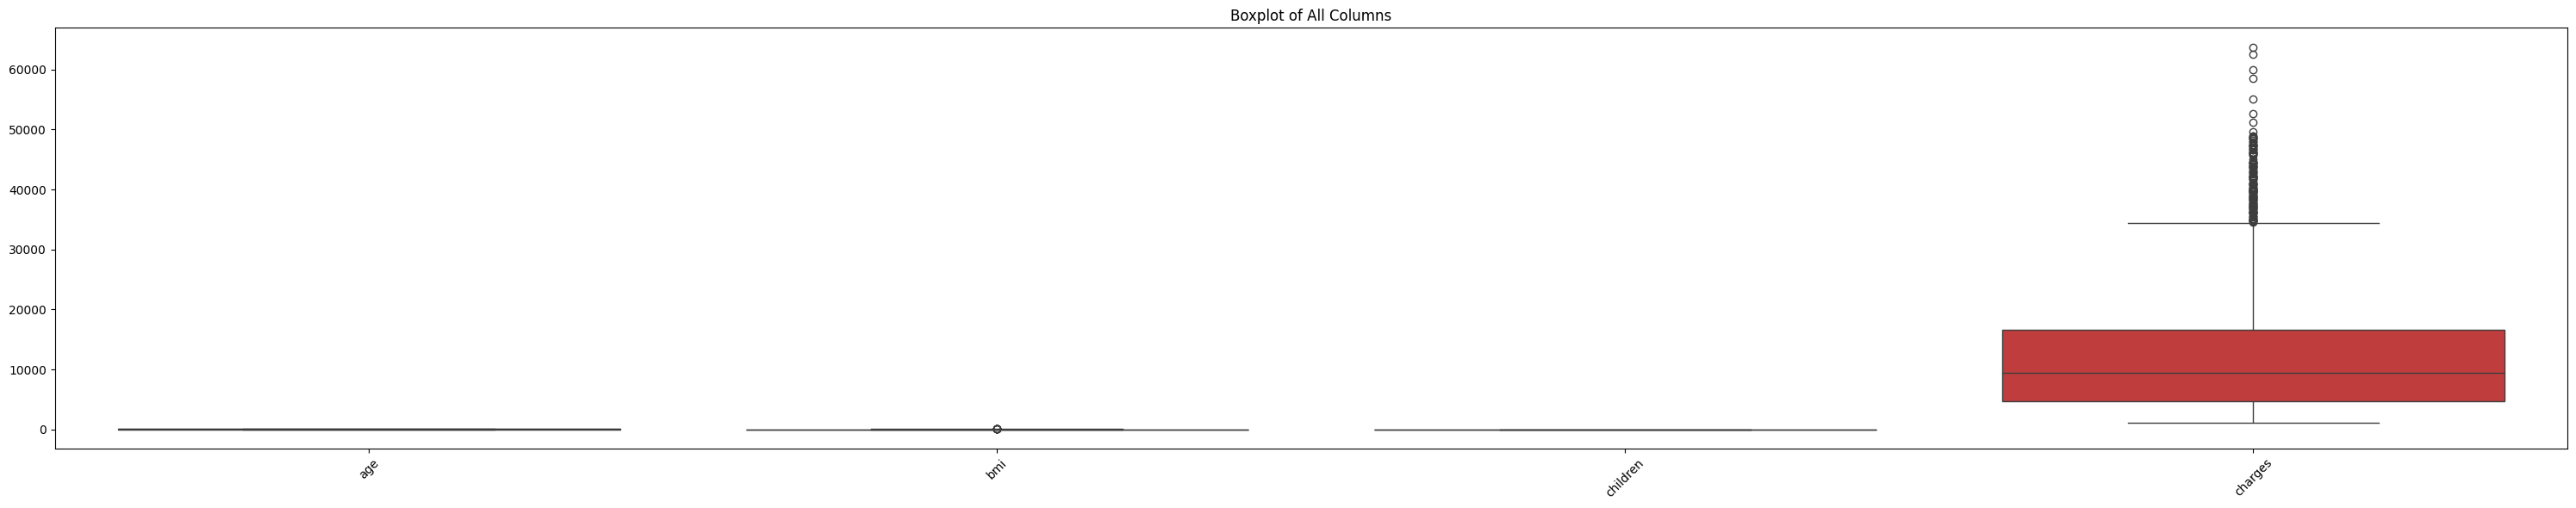

In [4]:
plt.figure(figsize=(30, 6)) 
sns.boxplot(data=df)

plt.xticks(rotation=45) 
plt.title("Boxplot of All Columns")

plt.tight_layout()
plt.show()

In [5]:
# encoding sex column
df.replace({'sex':{'male':0,'female':1}}, inplace=True)

3 # encoding 'smoker' column
df.replace({'smoker':{'yes':0,'no':1}}, inplace=True)

# encoding 'region' column
df.replace({'region':{'southeast':0,'southwest':1,'northeast':2,'northwest':3}}, inplace=True)

C:\Users\Manik\AppData\Local\Temp\ipykernel_2616\3055851464.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'sex':{'male':0,'female':1}}, inplace=True)
C:\Users\Manik\AppData\Local\Temp\ipykernel_2616\3055851464.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'smoker':{'yes':0,'no':1}}, inplace=True)
C:\Users\Manik\AppData\Local\Temp\ipykernel_2616\3055851464.py:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, expl

In [6]:
df2 = df.copy()
z=np.abs(stats.zscore(df2['age']))
print(np.where(z>3))
df2.drop(df2.index[np.where(z > 3)[0]], inplace=True)

z=np.abs(stats.zscore(df2['sex']))
print(np.where(z>3))
df2.drop(df2.index[np.where(z > 3)[0]], inplace=True)

z=np.abs(stats.zscore(df2['bmi']))
print(np.where(z>3))
df2.drop(df2.index[np.where(z > 3)[0]], inplace=True)

z=np.abs(stats.zscore(df2['children']))
print(np.where(z>3))
df2.drop(df2.index[np.where(z > 3)[0]], inplace=True)

z=np.abs(stats.zscore(df2['smoker']))
print(np.where(z>3))
df2.drop(df2.index[np.where(z > 3)[0]], inplace=True)

z=np.abs(stats.zscore(df2['region']))
print(np.where(z>3))
df2.drop(df2.index[np.where(z > 3)[0]], inplace=True)

z=np.abs(stats.zscore(df2['charges']))
print(np.where(z>3))
df2.drop(df2.index[np.where(z > 3)[0]], inplace=True)

(array([], dtype=int64),)
(array([], dtype=int64),)
(array([ 116,  847, 1047, 1317]),)
(array([  32,   71,  165,  412,  424,  437,  567,  639,  875,  930,  935,
        967,  982, 1082, 1113, 1127, 1242, 1269]),)
(array([], dtype=int64),)
(array([], dtype=int64),)
(array([  33,  536,  569,  810, 1127, 1211, 1279]),)


In [7]:
df2.reset_index(drop=True, inplace=True)
df2.info()
df2.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1309 non-null   int64  
 1   sex       1309 non-null   int64  
 2   bmi       1309 non-null   float64
 3   children  1309 non-null   int64  
 4   smoker    1309 non-null   int64  
 5   region    1309 non-null   int64  
 6   charges   1309 non-null   float64
dtypes: float64(2), int64(5)
memory usage: 71.7 KB


,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,0,1,16884.92400
1,18,0,33.770,1,1,0,1725.55230
2,28,0,33.000,3,1,0,4449.46200
3,33,0,22.705,0,1,3,21984.47061
4,32,0,28.880,0,1,3,3866.85520


In [8]:
X=df2.drop("charges",axis=1)
y=df2["charges"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [9]:
model = LinearRegression()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
model.score(X_test,y_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
model_score = model.score(X_test, y_test)

print(f"Mean Squared Error : {mse}")
print(f"R^2 Score : {r2}")
print(f"Model Score : {model_score}")

Mean Squared Error : 30331081.950278234
R^2 Score : 0.7795586966462271
Model Score : 0.7795586966462271


In [10]:
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [11]:
y_pred = rf_model.predict(X_test)

In [19]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
model_score = rf_model.score(X_test, y_test)

print(f"Mean Squared Error : {mse}")
print(f"R^2 Score : {r2}")
print(f"Model Score : {model_score}")

Mean Squared Error : 17883212.769857455
R^2 Score : 0.8700277577436024
Model Score : -0.25008174054506216


c:\Users\Manik\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


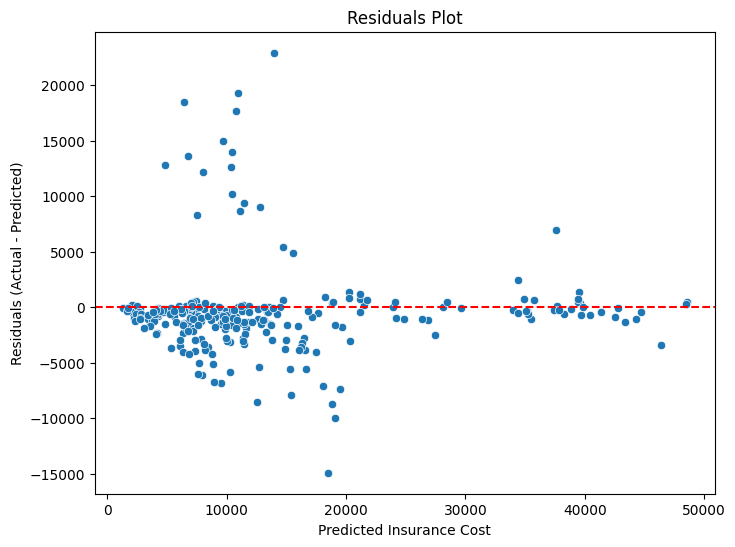

In [13]:
# Residuals
residuals = np.array(y_test) - np.array(y_pred)

plt.figure(figsize=(8,6))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(0, color='red', linestyle='--')

# Adding labels and title
plt.xlabel('Predicted Insurance Cost')
plt.ylabel('Residuals (Actual - Predicted)')
plt.title('Residuals Plot')

# Show plot
plt.show()

In [14]:
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)
X=df2.drop("charges",axis=1)
y1=df2["charges"]
X_train, X_test, y1_train, y1_test = train_test_split(X, y1, test_size=0.2, random_state=42)
xgb_model.fit(X_train, y1_train)
y1_pred_xgb = xgb_model.predict(X_test)
model_score = xgb_model.score(X_test , y_test)
mse_xgb = mean_squared_error(y1_test, y1_pred_xgb)
r2_xgb = r2_score(y1_test, y1_pred_xgb)

print(f"XGBoost - Mean Squared Error: {mse_xgb}")
print(f"XGBoost - R^2 Score: {r2_xgb}")
print(f"XGBoost - Model Score: {model_score}")


XGBoost - Mean Squared Error: 23538114.548911195
XGBoost - R^2 Score: 0.8289288638579281
XGBoost - Model Score: 0.8289288638579281


In [234]:
import pickle
with open("insurance_model.pkl", "wb") as file:
    pickle.dump(rf_model, file)